In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from seaborn import heatmap
plt.style.use('ggplot')
%matplotlib inline

## Load the Breast cancer dataset

In [3]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
X = bc.data
df = pd.DataFrame(X, columns=bc.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y = bc.target

# Automate PCA with sklearn

In [4]:
from sklearn.decomposition import PCA
pca = PCA()
x_lr = pca.fit_transform(X)

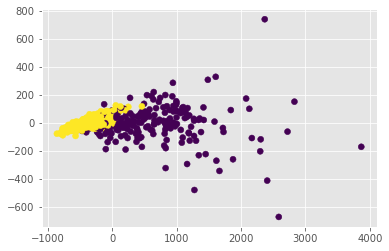

In [7]:
plt.scatter(x_lr[:, 0], x_lr[:, 1], c=y)

## Variance of each component - Scree Plots

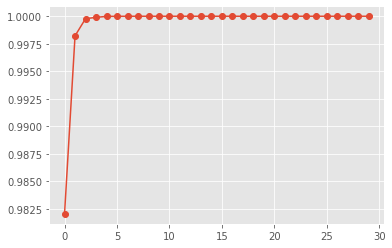

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),'-o')
plt.show()

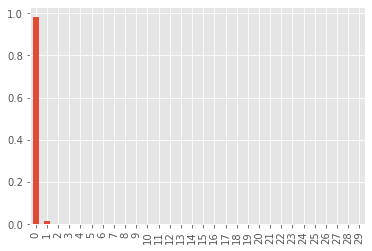

In [10]:
pd.Series(pca.explained_variance_ratio_).plot(kind='bar')
plt.show()

## Biplot

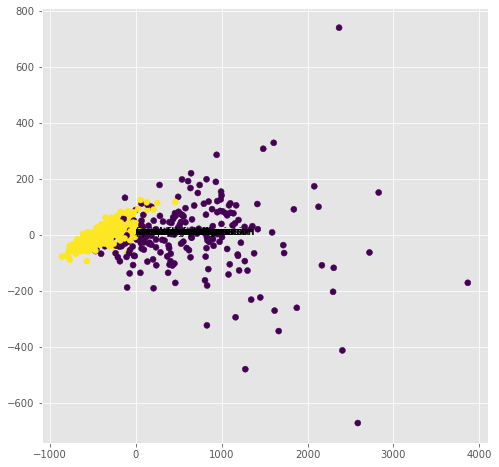

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_lr[:, 0], x_lr[:, 1], c=y)
components = pca.components_
sv = pca.singular_values_
for i, feat in enumerate(bc.feature_names):
    xx, yy = components[:2, i] # * sv[i]
    ax.arrow(0, 0, xx, yy, color='r', width=0.02 ,length_includes_head=True, head_width=0.1)
    ax.text(xx, yy, feat)